<a href="https://colab.research.google.com/github/archanadby05/Neural_Network_from_Scratch/blob/master/basic-neural-networks/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Recap - McCulloch-Pitts Neuron**
*italicized text*

The McCulloch-Pitts (MCP) neuron is a binary classifier that works by applying weights to inputs and comparing the weighted sum to a threshold (bias).

It does not **learn** from data and cannot adapt its weights. That's why we move from MCP to Perceptron, which learns.

We need a way to **adjust** the weights over time based on errors.

## **01. Define a Simple, Manual Perceptron**

In [1]:
import numpy as np

In [2]:
# Example: AND gate
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 0, 0, 1])  # Expected outputs for AND gate

In [3]:
# Manually set weights and bias
weights = np.array([0.5, 0.5])
bias = -0.7

## **02. Define the Step Function**

A simple binary step function (threshold function) that determines output

It outputs 1 if the weighted sum is >= 0, else it outputs 0.

In [4]:
def step_function(x):
    return 1 if x >= 0 else 0

## **03. Calculate Output Manually**

Now, for each input, calculate the weighted sum and apply the step function.

In [6]:
# List to store the outputs

outputs = []

In [7]:
for i in range(len(inputs)):
    # Weighted sum: (input1*weight1) + (input2*weight2) + bias

    weighted_sum = np.dot(inputs[i], weights) + bias

    output = step_function(weighted_sum)  # Apply the step function
    outputs.append(output)

In [8]:
print("Manual Perceptron outputs:", outputs)

Manual Perceptron outputs: [0, 0, 0, 1]


## **04. Perceptron Class Implementation**

Now, we want to make the perceptron reusable by converting it into a class.

This will make it easier to train and predict with any dataset.

In [9]:
# import numpy as np

In [10]:
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 0, 0, 1])

In [11]:
class Perceptron:
    def __init__(self, input_dim, learning_rate=0.1, epochs=1000):
        """
        Initialize the perceptron with the number of inputs (input_dim),
        learning rate, and number of epochs for training.
        """
        self.input_dim = input_dim
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.zeros(input_dim)  # Initialize weights to zero
        self.bias = 0  # Initialize bias to zero

    def step_function(self, x):
        if x >= 0:
          return 1
        else:
          return 0

    def fit(self, X, y):
        """
        Train the perceptron on dataset X (inputs) and y (labels).
        Adjust weights based on the error using the perceptron learning rule.

        Args:
        X (array-like): Input data.
        y (array-like): Corresponding labels.
        """
        for epoch in range(self.epochs):
            for inputs, label in zip(X, y):
                weighted_sum = np.dot(inputs, self.weights) + self.bias
                prediction = self.step_function(weighted_sum)
                error = label - prediction
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error

    def predict(self, X):
        """
        Predict outputs for the given inputs X based on learned weights.

        Args:
        X (array-like): Input data.

        Returns:
        list: Predictions for the input data.
        """
        return [self.step_function(np.dot(inputs, self.weights) + self.bias) for inputs in X]

In [12]:
perceptron = Perceptron(input_dim=2)
perceptron.fit(inputs, labels)
predictions = perceptron.predict(inputs)

In [13]:
print("Perceptron predictions for AND gate:", predictions)

Perceptron predictions for AND gate: [0, 0, 0, 1]


## **05. Visualize the Decision Boundary**

Plotting decision boundary to see how the perceptron classifies inputs

In [17]:
## Visualize the decision boundary learned by the model.
## Plot the data points and decision regions.

In [14]:
import matplotlib.pyplot as plt

In [18]:
def plot_decision_boundary(X, y, model, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    grid_points = np.c_[xx.ravel(), yy.ravel()]
    predictions = np.array(model.predict(grid_points)).reshape(xx.shape)

    plt.contourf(xx, yy, predictions, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100, cmap=plt.cm.RdYlBu)
    plt.title(title)
    plt.show()

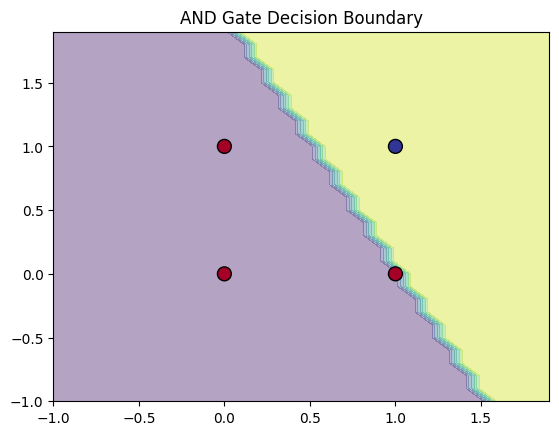

In [19]:
plot_decision_boundary(inputs, labels, perceptron, title="AND Gate Decision Boundary")